<!-- JPN -->
# 総合演習

<!-- ENG -->
# Comprehensive exercise

<!-- JPN -->
授業では主に分類問題を取り扱ってきたが、この課題では回帰問題に取り組むことで各種の手法が分類問題ではなく回帰問題にも適用できることを理解しておきたい。
なお、いくつか実数値を解答する課題があるが、**誤差は0.01まで許容する**ので、適宜桁数を削減して解答せよ。

<!-- ENG -->
In previous classes, we have mainly dealt with classification problems. But in the exercise, we will try regression problems to understand that learned methods can be applied to regression problems as well as classification problems.

When real numbers are required as the answer, **errors are allowed up to 0.01**. Reduce the number of digits as appropriate.

------------

<!-- JPN -->
## 1 | データセットの構築、データクレンジング

<!-- ENG -->
## 1 | Data set construction & data cleansing

<!-- JPN -->
この課題では、"Auto MPG Data Set" を元としたデータセット `mpg_dataset.csv` を用いる。このデータセットには1970年から1982年までに製造された車について、複数の車の性能情報と、その車の燃費がまとめられている。

<!-- ENG -->
For this assignment, we use the dataset `mpg_dataset.csv`, which is based on the "Auto MPG Data Set". This dataset contains the performance information of several cars manufactured between 1970 and 1982, as well as the fuel consumption of those cars.

<!-- JPN -->
まずは pandas を利用して、このデータセットを読み込む。

<!-- ENG -->
First, we read this data set using pandas.

In [1]:
import pandas as pd

In [2]:
# Please do not change the file path (because of auto-grading)
# Use of packages dedicated to google drive is also not allowed
df = pd.read_csv("mpg_dataset.csv")

In [3]:
print(df.head())

    MPG  Cylinders  Displacement  Horsepower  Acceleration  Model Year  \
0  18.0          8         307.0       130.0          12.0          70   
1  15.0          8         350.0       165.0          11.5          70   
2  18.0          8         318.0       150.0          11.0          70   
3  16.0          8         304.0       150.0          12.0          70   
4  17.0          8         302.0       140.0          10.5          70   

   Origin  Weight Category  
0       1                3  
1       1                3  
2       1                3  
3       1                3  
4       1                3  


In [4]:
print(df.columns) # Show all column names

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Acceleration',
       'Model Year', 'Origin', 'Weight Category'],
      dtype='object')


<!-- JPN -->

このデータセットが持つ変数（特徴量）の説明を簡単に記載する。

|  変数  | 説明  |
| ---- | ---- |
|  MPG  |  燃費（1ガロンで何マイル走れるか）  |
|  Cylinders  | 気筒数 |
| Displacement | 排気量 |
| Horsepower | 馬力 |
|Acceleration | 加速度 |
|Model Year| モデル年式（製造年）|
|Origin| 製造企業の所在地（1 アメリカ、2 ヨーロッパ、3 日本）|
|Weight Category | 車体の重量 （1 2000ポンド未満、2 2000-3000ポンド、3 3000-4000ポンド、4 4000ポンド以上）|


<!-- ENG -->
The following is a brief description of the variables (features) that this data set has.

| Variable | Description
| ---- | ---- |
| MPG | Fuel consumption (how many miles you can drive in one gallon) |
| Cylinders | Number of cylinders |
| Displacement | Engine displacement |
| Horsepower | Engine power |
|Acceleration | Acceleration performance |
|Model Year| Model Year (year of manufacture) |
|Origin| Manufacturer's Location (1 USA, 2 Europe, 3 Japan) |
|Weight Category | Vehicle Weight (1 Less than 2000 lbs, 2 2000-3000 lbs, 3 3000-4000 lbs, 4 More than 4000 lbs) |


----------------

<!-- JPN -->
### 課題 1.1

<!-- ENG -->
### Exercise 1.1

<!-- JPN -->
このデータセットが持つ変数（特徴量）のうち、欠損値を含む列名を全てまとめた配列を `variables_with_missing_values` に代入せよ。


<!-- ENG -->
Which of the variables (features) in this data set contain missing values? Create a list of the name of variables and assign it to `variables_with_missing_values`.

In [5]:
# CODE CELL FOR YOUR ANSWER
import pandas as pd

# Please do not change the file path (because of auto-grading)
# Use of packages dedicated to google drive is also not allowed
df = pd.read_csv("mpg_dataset.csv")

variables_with_missing_values = df.isna().any()[df.isna().any()].index.tolist()

print(variables_with_missing_values)


['Horsepower']


----------------------

<!-- JPN -->
ここでは、欠損値を含む車のデータは（全体の2,3%程度なので）削除してしまおう。

<!-- ENG -->
Here, let's delete the data of cars that contain missing values (since they are only 2 or 3% of the total).

In [6]:
df = df.dropna()

<!-- JPN -->
今回用いる特徴量は、一部**連続値として用いるのが不適**なものが存在する。このような特徴量に対しては、**one-hot encoding** を行うことが最も単純な対策となる。この操作は、ある特徴量を複数の0,1で表現するものである。

　例えば、ある特徴量は "h", "l", "s" のいずれか1文字で表現されていたとする。文字をそのまま機械学習に用いることができないため、1つの特徴量を3つの数値で表現することで学習可能な情報に変換する。

<!-- ENG -->
Some of the features used in this assignment are **not suitable for use as continuous values**. For such features, the simplest solution is to perform **one-hot encoding**. In this operation, a feature is represented by multiple 0s and 1s.

　For example, suppose a feature is represented by one of the letters "h", "l", or "s". Since the letters cannot be used directly for machine learning, the feature is converted to learnable information by expressing it as three numbers.

$$
  h \rightarrow [1,0,0] \\
  l \rightarrow [0,1,0] \\
  s \rightarrow [0,0,1]
$$


<!-- JPN -->
このような文字列を0,1列に変換する one-hot encoding は、pandasでは `pd.get_dummies()` で行うことができる。

<!-- ENG -->
One-hot encoding, converting a string into 0,1 columns, can be done with `pd.get_dummies()` in pandas.

<!-- JPN -->
　ここでは、与えられたデータセットの特徴量のうち、"Origin" と "Weight Category" について one-hot encoding を行うことにする。ただし、 "Origin" も "Weight Category" も、データセットの中では数値で表現されているが、 `pd.get_dummies()` は元々数値である特徴量を one-hot encoding の対象にしない。数値を一旦文字列に変換し、その後に `pd.get_dummies()` 関数を用いることで one-hot encoding を実現する。

<!-- ENG -->
　Here, we perform one-hot encoding for the features "Origin" and "Weight Category" in the given dataset. While "Origin" and "Weight Category" are both represented as numbers in the dataset, `pd.get_dummies()` does not perform one-hot encoding on features that are originally numbers. So, converting numeric values to strings and then using the `pd.get_dummies()` function will realize one-hot encoding.

In [7]:
# one-hot encoding by get_dummies() without casting numerical values to string
df = pd.get_dummies(df)
# it will not affect numerical columns
print(df.columns)

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Acceleration',
       'Model Year', 'Origin', 'Weight Category'],
      dtype='object')


In [8]:
# cast from numerical value to string
df["Origin"] = df["Origin"].astype(str)
df["Weight Category"] = df["Weight Category"].astype(str)

In [9]:
df = pd.get_dummies(df)
print(df.columns)

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Acceleration',
       'Model Year', 'Origin_1', 'Origin_2', 'Origin_3', 'Weight Category_1',
       'Weight Category_2', 'Weight Category_3', 'Weight Category_4'],
      dtype='object')


<!-- JPN -->
　これにより、例えば "Origin" は "Origin_1", "Origin_2", "Origin_3" の3つの特徴量に分割されたことがわかる。そのうち必ず1つが `1` になっており、その他は `0` となっていることは各自確認してほしい（課題ではない）。

<!-- ENG -->
　We can now see that, for example, "Origin" has been split into three features: "Origin_1", "Origin_2", and "Origin_3". Please check that one of them is always `1` and the others are `0` (not an assignment).

<!-- JPN -->
　続いて、このデータを訓練データとテストデータに分割しよう。ここでは、授業で取り扱った `train_test_split()` を用いる代わりに、 **"Model Year" が80未満（1970年代）のものを訓練データ、"Model Year" が80以上（1980年代）のものをテストデータ**とする。

<!-- ENG -->
　Next, let's split this dataset into training data and test data. Here, instead of using `train_test_split()` as we did in the lecture, let's use **the data whose "Model Year" is less than 80 (1970s) as the training data, and the data whose "Model Year" is equal to or more than 80 (1980s) as the test data**.

In [10]:
train_df = df[df["Model Year"] <  80]
test_df  = df[df["Model Year"] >= 80]

<!-- JPN -->
これで、訓練データとテストデータの準備が完了した。

<!-- ENG -->
Now, the training and test data are ready.

<!-- JPN -->
　データセットの準備の仕上げとして、それぞれのデータを説明変数 `X` と目的変数 `y` に分割しよう。（事後の処理を簡単にするために、pandas DataFrameのまま `X` を準備する。これでもこの後のscikit-learnをそのまま使えるので覚えておこう）

<!-- ENG -->
　Finally, let's split each dataset into explanatory variables `X` and objective variables `y`. (To simplify the following process, let's prepare `X` as a pandas DataFrame (Keep in mind that this is still possible to use directly with scikit-learn).

In [11]:
# MPG is the objective value

train_X = train_df.drop("MPG", axis=1)
test_X  = test_df.drop("MPG", axis=1)

train_y = train_df["MPG"].to_numpy()
test_y  = test_df["MPG"].to_numpy()

------

<!-- JPN -->
### 課題 1.2

　ここでは、"Origin" と "Weight Category" について one-hot encoding を実施した。このうち、"Origin" について、何故 one-hot encoding しなければならないか、選択肢から最も適切なものを選択せよ。

1. 目的変数である "MPG" と "Origin" との間に十分な相関が観測できなかったから
2. 製造国を識別するための記号であり、その数値の大小関係に意味がないから
3. "Origin" の値に大きな偏りがあり、 one-hot encoding をすることでその偏りを低減できるから


<!-- ENG -->
### Exercise 1.2

　In this section, one-hot encoding was performed for "Origin" and "Weight Category". For "Origin", choose the most appropriate reason why one-hot encoding must be performed.

1. Because we could not observe a sufficient correlation between the objective variable "MPG" and the variable "Origin"
2. Because it is a symbol used to identify the country of manufacture, and the magnitude of the values is meaningless
3. There is a large bias in the value of "Origin" and one-hot encoding can reduce the bias.


<!-- JPN -->
<font color=orange> **このテキストセルをダブルクリックし答案を記述せよ。** </font>
<!-- この下の行から答案を記述 -->


<!-- ENG -->
<font color=orange> **Double-click this text cell and write your answer.** </font>
<!-- From the next line, write your answer -->
Because it is a symbol used to identify the country of manufacture, and the magnitude of the values is meaningless.

------

<!-- JPN -->
### 課題 1.3（発展）

　線形回帰や多項式回帰、ニューラルネットワーク、主成分分析などを用いる際には "Weight Category" は one-hot encoding することが適切である。一方で**決定木に基づく方法（ランダムフォレストなどを含む）の場合は "Weight Category" は必ずしも one-hot encoding する必要がない**。理由を答えよ。


<!-- ENG -->
### Exercise 1.3 (Advanced)

　When using linear regression, polynomial regression, neural networks, principal component analysis, etc., it is appropriate to use one-hot encoding for the "Weight Category". On the other hand, **for methods based on decision trees (including random forests, etc.), "Weight Category" does not necessarily need to be one-hot encoded**. Answer why.


<!-- JPN -->
<font color=orange> **このテキストセルをダブルクリックし答案を記述せよ。** </font>
<!-- この下の行から答案を記述 -->


<!-- ENG -->
<font color=orange> **Double-click this text cell and write your answer.** </font>
<!-- From the next line, write your answer -->
In decision tree-based methods like random forests, one-hot encoding for "Weight Category" is not necessary because these algorithms can naturally handle categorical variables. Decision trees split the data based on categories without the need for one-hot encoding, making it more straightforward to work with categorical data without expanding feature dimensions.

----------------

<!-- JPN -->
### 課題 1.4

　製造年などの時系列に基づいてデータを分割することは、`train_test_split()` を用いるよりも一般的には好ましい。理由として最も適切ものを選択肢から選択せよ。

1. `train_test_split()` はランダム性があるために毎回結果が異なるが、時系列に基づくデータ分割は常に同じ分割結果となるため
2. 時系列に基づくデータ分割を行うことで、予測精度を下げ、より厳密に手法を比較することができるようになるため
3. 過去のデータから未来を予測するという関係が現実の応用に即しているため


<!-- ENG -->
### Exercise 1.4

　Splitting data based on a time series, such as year of manufacture, is generally preferable to using `train_test_split()`. Choose the most appropriate reason from the choices.

1. Because the result of `train_test_split()` varies each time due to randomness, but the result of splitting data based on time series is always the same.
2. Because time-series based data splitting reduces the prediction accuracy and allows us to compare methods more rigorously.
3. Because the relationship of predicting the future from the past data is consistent with real-world applications.


<!-- JPN -->
<font color=orange> **このテキストセルをダブルクリックし答案を記述せよ。** </font>
<!-- この下の行から答案を記述 -->


<!-- ENG -->
<font color=orange> **Double-click this text cell and write your answer.** </font>
<!-- From the next line, write your answer -->
Because the relationship of predicting the future from the past data is consistent with real-world applications.

-------

<!-- JPN -->
## 2 | 教師なし学習：主成分分析による可視化

<!-- ENG -->
## 2 | Unsupervised learning: visualization by principal component analysis

<!-- JPN -->
　準備されたデータセットは10個以上の特徴量から構成されているため、視覚的にわかりやすい散布図を作ることは難しい。その代わりに、**主成分分析による次元削減**を通してどのようなデータ点の分布になっているのかを確認する。

<!-- ENG -->
  Since the prepared data set consists of more than 10 features, it is difficult to create a scatter plot that is easy to understand visually. Instead, we will check how the data points are distributed through **dimensionality reduction by principal component analysis (PCA)**.

<!-- JPN -->
　今回のデータでは値の範囲が各特徴量で大きく異なり、主成分分析の寄与率の算出に悪影響を与えるため、ここでは各特徴量の標準化を行った上で主成分分析を行うことにする。なお、以下のコードで出てくる `fit_transform()` とは、同一の入力データに対して `fit()` を行ってから `transform()` を行うメソッド（関数）である。

<!-- ENG -->
In this data, the range of values differs greatly for each feature, which adversely affects the calculation of the explained variance ratio of PCA. Therefore, we will standardize each feature before performing principal component analysis. Note that `fit_transform()` in the following code is the method (function) that performs `fit()` and then `transform()` for the same input data.

In [ ]:
# standardization of features
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_std_X = ss.fit_transform(train_X)
test_std_X  = ss.transform(test_X)

In [ ]:
# principal component analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
train_std_pca_X = pca.fit_transform(train_std_X)
test_std_pca_X  = pca.transform(test_std_X)

In [ ]:
# scatter plot with two principal components
import matplotlib.pyplot as plt
plt.scatter(train_std_pca_X[:,0], train_std_pca_X[:,1], label="training dataset")
plt.scatter(test_std_pca_X[:,0],  test_std_pca_X[:,1],  label="test dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

<!-- JPN -->
　訓練データとテストデータを同じ空間に描画すると、テストデータの各点は訓練データの近くに存在しているようだ。この場合には学習したモデルがテストデータを適切に予測してくれる可能性が高い（より詳細な議論は「適用領域 applicability domain」などで検索すると良い）。

<!-- ENG -->
When the training and test data are drawn in the same space, each point of the test data seems to exist close to the training data. In this case, the trained model is more likely to predict the test data appropriately (for more detailed discussion, search for "applicability domain" etc.)

<!-- JPN -->
　しかしながら、**訓練データとテストデータが主成分分析の射影空間上で近傍にあるだけでは予測がうまく行く条件としては不十分**である。なぜなら、これらの**主成分が目的変数の予測に有用とは限らない**からだ。そこで、ここでは訓練データの各点がどのような目的変数 MPG であるかを合わせて描画し、予測モデルが十分に機能しそうかを評価してみる。

<!-- ENG -->
　However, the mere fact that **training and test data are close together in the projection space of principal component analysis** is not a sufficient condition for successful prediction. This is because these **principal components are not always useful for predicting the target variable**. In this section, we will try to evaluate whether the prediction model works well by drawing the MPG (the target variable) on each point in the training data.

In [ ]:
plt.scatter(train_std_pca_X[:,0], train_std_pca_X[:,1], c=train_y, cmap="jet")
plt.colorbar()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("MPG (training dataset)")
plt.show()

<!-- JPN -->
　この図を見る限り、大まかに「PC1の値が高いほど燃費が悪く（MPGの値が低く）」、「PC2の値が高いほど燃費が良い（MPGの値が高い）」という傾向が見られ、**目的変数の予測がこの2つの主成分から行えることが示唆**された。

<!-- ENG -->
　This figure shows a general trend that the higher the value of PC1, the worse the fuel economy (lower value of MPG), and the higher the value of PC2, the better the fuel economy (higher value of MPG), suggesting that **the objective variable can be predicted from these two principal components**.

<!-- JPN -->
　以上の議論から、以下2点の事実がわかった。

- 訓練データとテストデータは、第1主成分および第2主成分からなる**射影空間中で隣接**しあっている。
- 第1主成分および第2主成分はMPGの推定に有用である。すなわち、**第1主成分および第2主成分が似通ったデータは似通ったMPGの値を有すると推測**される。

これら2つの事実から、**訓練データから学習されたモデルはテストデータも適切に予測することが可能**であると推定される。

<!-- ENG -->
From the above discussion, the following two facts were found.

* The training data and the test data are adjacent to each other in the projective space consisting of the first and second principal components.
* The first and second principal components are useful for MPG estimation. That is, data with similar first and second principal components are estimated to have similar MPG values.

From these two facts, it can be inferred that the model trained from the training data can also predict the test data adequately.

------

<!-- JPN -->
### 課題 2.1

以下の空欄に適切な数値を記入せよ。

```
標準化 standardization とは、各特徴量について、平均 [ ]、分散 [ ] になるように値を変換する操作のことを指す。
```

<!-- ENG -->
### Exercise 2.1

Fill in the blanks below with the appropriate numbers.

```
Standardization refers to the operation of transforming the values for each feature so that the mean [ ] and variance [ ].
```

<!-- JPN -->
<font color=orange> **このテキストセルをダブルクリックし答案を記述せよ。** </font>
<!-- この下の行から答案を記述 -->


<!-- ENG -->
<font color=orange> **Double-click this text cell and write your answer.** </font>
<!-- From the next line, write your answer -->


------

<!-- JPN -->
### 課題 2.2

PCAで累積寄与率が80%を越える最小の次元数 `n_minimum_pcs` を求めよ。ただし、PCAは標準化後の説明変数に対して行え。

<!-- ENG -->
### Exercise 2.2

Find the minimum number of dimensions `n_minimum_pcs` for which the cumulative contribution exceeds 80% in PCA? Note that PCA should be performed for the standardized explanatory variables.

In [ ]:
# CODE CELL FOR YOUR ANSWER

from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=...)
...
n_minimum_pcs = ...


------

<!-- JPN -->
### 課題 2.3（発展）

今回の解析では、テストデータの説明変数 `test_X` があらかじめわかっていることを前提としていたが、現実の問題では必ずしもそうであるとは限らない。例えば、センサーの情報から機械が正常に動作しているか否かを予測する場合、実際に予測するタイミングになるまでセンサーの値 `test_X` を得ることができない。

　予測モデルの構築時に**既に予測すべきデータの説明変数の値があらかじめわかっている**場合の例と、**予測モデルの構築時に予測すべきデータの説明変数の値がまだわからない**場合の例をそれぞれ答えよ。

<!-- ENG -->
### Exercise 2.3 (Advanced)

In this analysis, it was assumed that the explanatory variables of the test data `test_X` were known in advance, but this is not always the case in real problems. For example, when predicting whether or not a machine is working correctly based on sensor information, the sensor value `test_X` cannot be obtained until the actual timing of the prediction.

　Give an example of a case where the explanatory variables of the data to be predicted **are already known in advance** when building the prediction model, and an example of a case where the explanatory variables of the data to be predicted **are not yet known** when building the prediction model, respectively.

<!-- JPN -->
<font color=orange> **このテキストセルをダブルクリックし答案を記述せよ。** </font>
<!-- この下の行から答案を記述 -->


<!-- ENG -->
<font color=orange> **Double-click this text cell and write your answer.** </font>
<!-- From the next line, write your answer -->


------

<!-- JPN -->
## 3 | 教師あり学習：ランダムフォレストとハイパーパラメータ探索

<!-- ENG -->
## 3 | Supervised Learning: Random Forest and Hyperparameter Search

<!-- JPN -->
　最後にランダムフォレストを用いた教師あり学習を行い、どの程度の精度が出るかを評価する。授業では `RandomForestClassifier()` を用いたが、これは Classifier つまり分類のためのモデルであるが、今回は回帰問題を取り扱っている。この時には `RandomForestRegressor()` を使う。まずは一回予測を行ってみよう。

<!-- ENG -->
　Finally, we will perform supervised learning using random forest and evaluate the accuracy we can achieve. In the class, we used `RandomForestClassifier()`, which refers a model for classification, but this time we are dealing with a regression problem. In this case, we will use `RandomForestRegressor()`. First, let's make a prediction once.

In [ ]:
# construct regression model
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=10, max_depth=None, random_state=0)

In [ ]:
rfr.fit(train_X, train_y)

In [ ]:
predicted = rfr.predict(test_X)

In [ ]:
print(predicted)

<!-- JPN -->
　予測結果が出力された。先ほど目視したMPGの数値からは大きく外れてはいないことがわかる。実際に予測がどの程度正確なのか、評価を行う。評価指標としては平均二乗誤差 (mean squared error; MSE) 、MSEの平方根 (root MSE; RMSE) 、平均絶対誤差 (mean absolute error; MAE) が主に用いられる。

<!-- ENG -->
　The prediction results were output. We can see that it is not far off from the MPG values we saw earlier. Here we can evaluate how accurate the prediction is. The main evaluation metrics used are mean squared error (MSE), root MSE (RMSE), and mean absolute error (MAE).

$$ \begin{align*}
 \mathrm{MSE}  &= \frac{\sum_{k=1}^N (y-\hat{y})^2}{N}\\
 \mathrm{RMSE} &= \sqrt{\mathstrut \mathrm{MSE}} = \sqrt{\frac{\sum_{k=1}^N (y-\hat{y})^2}{N}} \\
 \mathrm{MAE}  &= \frac{\sum_{k=1}^N |y-\hat{y}|}{N}
\end{align*} $$


<!-- JPN -->
上記の式からわかるように、 **MSE は二乗値がそのまま出力される**ことに注意せよ。

　また、これらとは別に、相関係数 $r$ や決定係数 $r^2$ が使われることも多い。この課題では扱わないが、各自確認してほしい。

<!-- ENG -->
As can be seen from the above equation, note that **the MSE outputs the squared value as it is**.

　Apart from these, the correlation coefficient $r$ and the coefficient of determination $r^2$ are also often used. These are not covered in this assignment, but please check them on your own.


In [ ]:
# define error functions
import numpy as np
def mse(true_y, pred_y):
  return np.mean( (true_y-pred_y)**2 )
def rmse(true_y, pred_y):
  return np.sqrt(mse(true_y, pred_y))
def mae(true_y, pred_y):
  return np.mean( np.abs(true_y-pred_y) )

In [ ]:
mse_val  = mse(test_y, predicted)
rmse_val = rmse(test_y, predicted)
mae_val  = mae(test_y, predicted)

# {var:.3f} displayes up to 3rd decimal place
# .3 means two numbers from decimal point
# f  means "for floating point variable (real value)"
print(f"mse : {mse_val:.3f}")
print(f"rmse: {rmse_val:.3f}")
print(f"mae : {mae_val:.3f}")

In [ ]:
# MSE and MAE are implemented in scikit-learn
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_sklearn_val  = mean_squared_error(test_y, predicted)
mae_sklearn_val  = mean_absolute_error(test_y, predicted)

print(f"mse: {mse_sklearn_val:.3f}")
print(f"mae: {mae_sklearn_val:.3f}")


-------

<!-- JPN -->
### 課題 3.1

交差検証法を用いて、ランダムフォレストに対する適切なハイパーパラメータを決定しよう。以下のコードの続きを記述することで、訓練データを用いた**5-fold 交差検証法**を行い、**MAEを最小にする**パラメータを `rf_best_parameters` に代入せよ。MAEを最小とするハイパーパラメータ探索は `GridSearchCV(..., scoring="neg_mean_absolute_error")` とすることで実現できる。

　探索するハイパーパラメータは以下の通りとする。この計算には1分程度の時間を要するので注意せよ。

|  変数  | パラメータの範囲  |
| ---- | ---- |
|  `n_estimators` | `10, 20, 50, 100, 200, 500`  |
|  `max_depth`  | `2, 4, 6, 8, 10, 12, 14, 16, 18, 20` |

<!-- ENG -->
### Exercise 3.1

Use the cross-validation method to determine the appropriate hyperparameters for the random forest. By completing the following code, perform the **5-fold cross-validation method** on the training data and assign the parameters to `rf_best_parameters` that **minimizes the MAE** with `GridSearchCV(..., scoring="neg_mean_absolute_error")`.

Here, the hyperparameters to be explored should be as follows. Note that it will takes a minute.

| variables | range of parameters |
| ---- | ---- |
| `n_estimators` | `10, 20, 50, 100, 200, 500` |
| `max_depth` | `2, 4, 6, 8, 10, 12, 14, 16, 18, 20` |

In [ ]:
# CODE CELL FOR YOUR ANSWER

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(random_state=0)

...
rf_best_parameters = ...

-----------

<!-- JPN -->
### 課題 3.2

課題 3.1 で得られた最適ハイパーパラメータ `best_n_estimators` および `best_max_depth` を用いて、訓練データ全件を用いて改めて学習済みモデルを構築し、テストデータに対する平均絶対誤差 MAE (mean absolute error) `test_mae_random_forest` を計算せよ（MSEではない）。**実行の際には `RandomForestRegressor()` に `random_state=0` を与えることを忘れないようにせよ（この後の課題に影響を及ぼす可能性がある）。**

<!-- ENG -->
### Exercise 3.2

Using the optimal hyperparameters `best_n_estimators` and `best_max_depth` obtained in exercise 3.1, build the trained model again using all the training data, and calculate the mean absolute error (MAE) `test_mae_random_forest` for the test data (not to calculate MSE). **Don't forget to give `random_state=0` to `RandomForestRegressor()` when you run it (it may affect the following exercises)**.

In [ ]:
# CODE CELL FOR YOUR ANSWER

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

best_n_estimators = ...
best_max_depth = ...

...
test_mae_random_forest = ...


-------------

<!-- JPN -->
### 課題 3.3

ランダムフォレストの重要度が高かった3つの特徴量 `important_features` を答えよ。

<!-- ENG -->
### Exercise 3.3

Answer three the most important features `important_features` according to the feature importances of the random forest.


In [ ]:
# CODE CELL FOR YOUR ANSWER

import numpy as np

...
important_features = ...


------

<!-- JPN -->
### 課題 3.4（発展）

なぜそれらの特徴量は重要なのか？（変数間の相関関係ではなく）現実世界における理由を考察せよ。

<!-- ENG -->
### Exercise 3.4 (Advanced)

Why are those features important? Consider the reasons in the real world (not correlations between variables.)

<!-- JPN -->
<font color=orange> **このテキストセルをダブルクリックし答案を記述せよ。** </font>
<!-- この下の行から答案を記述 -->


<!-- ENG -->
<font color=orange> **Double-click this text cell and write your answer.** </font>
<!-- From the next line, write your answer -->


------

<!-- JPN -->
### 課題 3.5（発展）
交差検証法以外の最良モデル選択方法は存在するか、議論せよ。必要に応じて追加実験を行い、課題 3.2で得られたテストデータに対する予測精度と比較しても良い。（その場合は適宜コードセルを追加して構わない）

<!-- ENG -->
### Exercise 3.5 (Advanced)
Discuss whether there is a best model selection method other than the cross-validation. If necessary, you may conduct additional experiments and compare your prediction accuracy with that of the test data obtained in exercise 3.2 (addition of code cells is allowed for this exercise).

<!-- JPN -->
<font color=orange> **このテキストセルをダブルクリックし答案を記述せよ。** </font>
<!-- この下の行から答案を記述 -->


<!-- ENG -->
<font color=orange> **Double-click this text cell and write your answer.** </font>
<!-- From the next line, write your answer -->


----------

<!-- JPN -->
## 4 | 教師あり学習①：線形回帰・多項式回帰


<!-- ENG -->
## 4 | Supervised learning 1: Linear and polynomial regression

<!-- JPN -->
　この課題では、線形回帰、多項式回帰、ニューラルネットワークを用いた回帰の3つに取り組む。これらのモデルを適切に評価・比較するために、まずは検証データの作成を行う。ここでは、訓練データのうち、製造年が1978年～1979年である車のデータを検証データとし、残りの訓練データ、すなわち製造年が1970年～1977年である車のデータを部分訓練データと呼ぶことにする。

<!-- ENG -->
In this exercise, we will work on three types of regression: linear regression, polynomial regression, and regression using neural networks. In order to properly evaluate and compare these models, we first prepare the validation data. Here, among the training data, we refer to the data of cars whose year of manufacture is 1978-1979 as the validation data, and the rest of the training data, i.e., the data of cars whose year of manufacture is 1970-1977, as the partial training data.

In [12]:
train_sub_X = train_X[train_X["Model Year"] <  78]
train_sub_y = train_y[train_X["Model Year"] <  78]
valid_X     = train_X[train_X["Model Year"] >= 78]
valid_y     = train_y[train_X["Model Year"] >= 78]

<!-- JPN -->
　これから線形回帰を行うのだが、その前に目的変数 MPG の予測に線形回帰が適しているのかどうかについて検討しよう。
線形回帰は、各説明変数（特徴量）と目的変数との間に線形の関係があるという仮定に基づいたモデルであった。


<!-- ENG -->
　We will now perform a linear regression, but before that, let us consider whether linear regression is suitable for predicting the objective variable MPG.
Linear regression is a model based on the assumption that there is a linear relationship between each explanatory variable (feature) and the objective variable.

$$
  \hat{y} = \sum_{k=0}^K \hat{w}_kx_k
$$

<!-- JPN -->
これは、各説明変数と目的変数との間に非線形な関係がある場合には、たとえ**変数間に非線形だが明確な関係性があったとしても線形回帰モデルでは表現できない**ことを意味する。

　以上の議論から、各説明変数と目的変数を2軸とした散布図を描画し、これが線形な関係にあるかどうかを見ることで、線形回帰に基づく予測が機能するか否かの判断材料にできる。実際にやってみよう。

<!-- ENG -->
This means that if there is a nonlinear relationship between each explanatory variable and the objective variable, **it cannot be represented by a linear regression model, even if there is a obvious relationship between the variables**.

　From the above discussion, by drawing a scatter plot with each explanatory variable and the objective variable as the two axes, and seeing whether or not there is a linear relationship between them, we can use this as a basis for judging whether or not predictions based on linear regression will work. Let's do this.

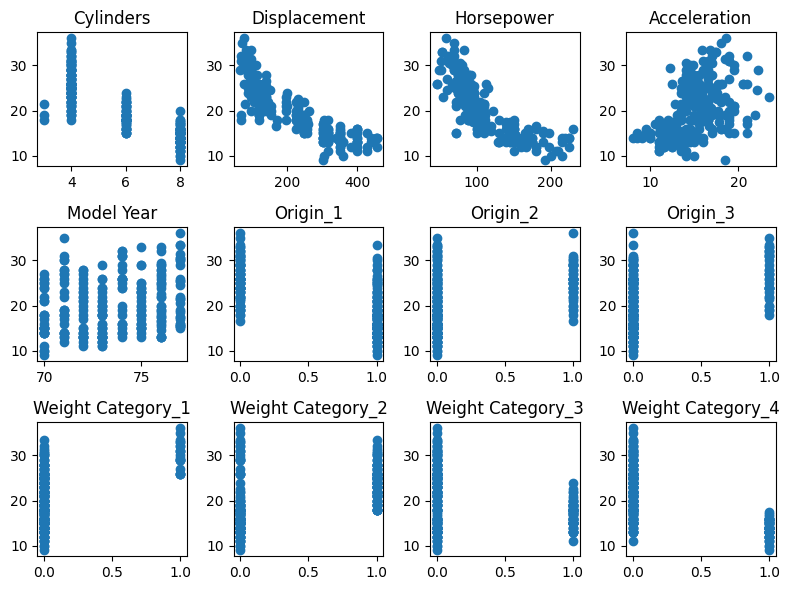

In [13]:
# draw figures: it's quite difficult...
import matplotlib.pyplot as plt
import numpy as np

n_features = len(train_sub_X.columns)
ncols = 4
nrows = int(np.ceil(n_features/ncols))
fig = plt.figure(figsize=(2*ncols, 2*nrows))

for i, col in enumerate(train_sub_X.columns):
  ax = fig.add_subplot(nrows, ncols, i+1)
  ax.scatter(train_sub_X[col], train_sub_y)
  ax.set_title(col)
  plt.tight_layout()

<!-- JPN -->
大まかに各説明変数と目的変数は線形の関係を持つようだが、一部の説明変数は線形とは異なる、曲線的な関係を持つようだ。これに留意しながら、以下の課題に取り組んでほしい。

<!-- ENG -->
It seems that each explanatory variable and the objective variable have a roughly linear relationship, but some explanatory variables seem to have a non-linear relationship. Please keep this in mind as you work on the following exercise.

------

<!-- JPN -->
### 課題 4.1

部分訓練データを用いて線形回帰予測モデルを構築し、部分訓練データ、検証データそれぞれに対する平均絶対誤差 MAE (mean absolute error) `mae_lr_train` および `mae_lr_valid` を求めよ。なお、MAEは `sklearn.metrics.mean_absolute_error()` で計算が可能である。


<!-- ENG -->
### Exercise 4.1

Construct a linear regression model using the partial training data, and calculate the mean absolute error (MAE) for the partial training data `mae_lr_train` and the validation data `mae_lr_valid`. MAE can be calculated with `sklearn.metrics.mean_absolute_error()`.

In [14]:
# CODE CELL FOR YOUR ANSWER

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

linear_reg_model = LinearRegression()

linear_reg_model.fit(train_sub_X, train_sub_y)

pred_train = linear_reg_model.predict(train_sub_X)
pred_valid = linear_reg_model.predict(valid_X)

mae_lr_train = mean_absolute_error(train_sub_y, pred_train)
mae_lr_valid = mean_absolute_error(valid_y, pred_valid)

print(f"MAE for Partial Training Data (linear regression): {mae_lr_train}")
print(f"MAE for Validation Data (linear regression): {mae_lr_valid}")

MAE for Partial Training Data (linear regression): 1.8024824527427263
MAE for Validation Data (linear regression): 3.066858038513792


-----

<!-- JPN -->
### 課題 4.2

部分訓練データを用いて**交互作用項を含む2次の項までを利用した多項式回帰予測モデル**を構築し、部分訓練データ、検証データそれぞれに対する平均絶対誤差 MAE `mae_pr_train` および `mae_pr_valid` を求めよ。

<!-- ENG -->
### Exercise 4.2

Construct a **polynomial regression** model using partial training data **up to the second order term including the interaction term**, and calculate the mean absolute error MAE for the partial training data `mae_pr_train` and the validation data `mae_pr_valid`.

In [15]:
# CODE CELL FOR YOUR ANSWER

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

poly_reg_model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())

poly_reg_model.fit(train_sub_X, train_sub_y)

pred_train_poly = poly_reg_model.predict(train_sub_X)
pred_valid_poly = poly_reg_model.predict(valid_X)

mae_pr_train = mean_absolute_error(train_sub_y, pred_train_poly)
mae_pr_valid = mean_absolute_error(valid_y, pred_valid_poly)

print(f"MAE for Partial Training Data (polynomial regression): {mae_pr_train}")
print(f"MAE for Validation Data (polynomial regression): {mae_pr_valid}")


MAE for Partial Training Data (polynomial regression): 1.117360082416495
MAE for Validation Data (polynomial regression): 2.9802488713539566


------

<!-- JPN -->
### 課題 4.3

Ridge正則化を導入し、**交互作用項を含む2次の項までを利用した多項式Ridge回帰予測モデル**を構築し、部分訓練データ、検証データそれぞれに対する平均絶対誤差 MAE を求めよ。ただし、Ridge回帰の正則化項に対する重み $\alpha$ は 0.1 とせよ。
この際、 `make_pipeline` を用いることで、**Ridge回帰を行う直前**に特徴量の標準化を行うことを忘れないようにせよ。


<!-- ENG -->
### Exercise 4.3

Construct a **polynomial Ridge regression** model using partial training data **up to the second order term including the interaction term**, and calculate the mean absolute error MAE for the partial training data and the validation data. Note that the weight $\alpha$ for the regularization term of Ridge regression should be 0.1.
Do not forget to standardize the features just before performing the Ridge regression by using `make_pipeline`.


In [16]:
# CODE CELL FOR YOUR ANSWER

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

poly_ridge_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    Ridge(alpha=0.1)
)

poly_ridge_model.fit(train_sub_X, train_sub_y)

pred_train_ridge = poly_ridge_model.predict(train_sub_X)
pred_valid_ridge = poly_ridge_model.predict(valid_X)

mae_ridge_train = mean_absolute_error(train_sub_y, pred_train_ridge)
mae_ridge_valid = mean_absolute_error(valid_y, pred_valid_ridge)

print(f"MAE for Partial Training Data (polynomial Ridge regression): {mae_ridge_train}")
print(f"MAE for Validation Data (polynomial Ridge regression): {mae_ridge_valid}")

MAE for Partial Training Data (polynomial Ridge regression): 1.236835377467574
MAE for Validation Data (polynomial Ridge regression): 2.8473079409896696


-----

<!-- JPN -->
### 課題 4.4

Ridge回帰の直前に行うべき操作である **標準化 standardization** とはどのようなものだったか。以下の空欄に適切な数値を記入せよ。

```
標準化 standardization とは、各特徴量について、平均 [ ]、分散 [ ] になるように値を変換する操作のことを指す。
```

<!-- ENG -->
### Exercise 4.4

What was **standardization**, the operation that should have been performed just before the Ridge regression? Fill in the blanks below with the appropriate numbers.

```
Standardization refers to the operation of transforming the values for each feature so that the mean [ ] and variance [ ].
```

<!-- JPN -->
<font color=orange> **このテキストセルをダブルクリックし答案を記述せよ。** </font>
<!-- この下の行から答案を記述 -->


<!-- ENG -->
<font color=orange> **Double-click this text cell and write your answer.** </font>
<!-- From the next line, write your answer -->
```
Standardization refers to the operation of transforming the values for each feature so that the mean [0] and variance [1].
```

----------

<!-- JPN -->
### 課題 4.5

課題 4.1 ～ 4.3 の結果から、どれが「最も良いモデル」と言えるだろうか。

- 線形回帰予測モデル
- 多項式回帰予測モデル
- 多項式Ridge回帰予測モデル
- 最良は決定できない

<!-- ENG -->
### Exercise 4.5

Based on the results of exercises 4.1-4.3, which of the following is the "best model"?

- Linear regression model.
- Polynomial regression model.
- Polynomial Ridge regression model.
- The best cannot be determined.

<!-- JPN -->
<font color=orange> **このテキストセルをダブルクリックし答案を記述せよ。** </font>
<!-- この下の行から答案を記述 -->


<!-- ENG -->
<font color=orange> **Double-click this text cell and write your answer.** </font>
<!-- From the next line, write your answer -->
**The Polynomial Regression model** is the "best model".

Because it has the lowest MAE on both the partial training data and the validation data.

-------

<!-- JPN -->
### 課題 4.6（発展）
今回のように、あらかじめ訓練データと検証データを分割した場合、 `GridSearchCV()` を単純に利用することができない。**多項式Ridge回帰について**、何らかの方法を用いて、以下のハイパーパラメータ空間（21通りの組み合わせがある）を探索し、**検証データに対するMAEを最小とする**最適なハイパーパラメータ `best_p` および `best_alpha` を報告せよ。

|  変数  | パラメータの範囲  |
| ---- | ---- |
|  次元数 `p` | `1, 2, 3`  |
|  正則化項の重み `alpha`  | `0.001, 0.01, 0.1, 1, 10, 100, 1000` |

<!-- ENG -->
### Exercise 4.6 (Advanced)

When the training and validation data are split in advance, as in this case, we cannot simply use `GridSearchCV()`. **For polynomial Ridge regression**, using some method, explore the following hyperparameter space (21 combinations) and report the optimal hyperparameters `best_p` and `best_alpha` **which minimizes MAE for validation data**.

| Variables | Range of parameters |
| ---- | ---- |
| number of dimensions `p` | `1, 2, 3` |
| weight of the regularization term `alpha` | `0.001, 0.01, 0.1, 1, 10, 100, 1000` |

In [17]:
# CODE CELL FOR YOUR ANSWER

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

poly_ridge_model = make_pipeline(
    PolynomialFeatures(include_bias=False),
    StandardScaler(),
    Ridge()
)

param_grid = {
    'polynomialfeatures__degree': [1, 2, 3],
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_search = GridSearchCV(poly_ridge_model, param_grid, scoring='neg_mean_absolute_error', cv=5)

grid_search.fit(train_sub_X, train_sub_y)

best_p = grid_search.best_params_['polynomialfeatures__degree']
best_alpha = grid_search.best_params_['ridge__alpha']

print(f"Best Degree (best_p): {best_p}")
print(f"Best Alpha (best_alpha): {best_alpha}")


Best Degree (best_p): 2
Best Alpha (best_alpha): 10


-----

<!-- JPN -->
## 5 | 教師あり学習②：ニューラルネットワークによる回帰予測

<!-- ENG -->
## 5 | Supervised Learning 2: Regression with Neural Networks

<!-- JPN -->
　基盤人工知能演習では、分類問題のみを用いてニューラルネットワークを学習したが、ニューラルネットワークを回帰問題に適用することが可能である。このセクションでは、課題に解答しながら回帰問題への適用方法を学ぼう。

<!-- ENG -->
　In the Exercise on Fundamental Artificial Intelligence, we learned neural networks only for classification problems, but it is possible to apply neural networks to regression problems. In this section, we will learn how to apply them to regression problems by doing the exercise.

<!-- JPN -->
　以下にデータの準備および各種関数の準備を行う。分類予測ではなく回帰予測を行う際に注意すべき点は以下の通りである。

- ニューラルネットワークに入力する特徴量はあらかじめ標準化（あるいは正規化）しておく（これは分類予測でも同様である）。
- 入力特徴量、出力特徴量共に `torch.float` にしておく。
- 1つの値を予測したいので、出力は1次元とする。
- 損失関数を `torch.nn.L1Loss` にする。

<!-- ENG -->
　In the following, we will prepare the data and various functions. The points to be noted when performing regression prediction instead of classification prediction are as follows.

- The features to be input to the neural network should be standardized (or normalized) in advance (This should be also true for classification).
- Both input and output features should be `torch.float`.
- The output should be one-dimensional because we want to predict a single value.
- Set the loss function to `torch.nn.L1Loss`.

In [18]:
# install livelossplot
!pip install livelossplot

In [19]:
# standardization of features
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_sub_std_X = ss.fit_transform(train_sub_X)
valid_std_X     = ss.transform(valid_X)

In [20]:
# prepare data
import torch
batch_size = 32

train_X_torch = torch.tensor(train_sub_std_X, dtype=torch.float)
valid_X_torch = torch.tensor(valid_std_X, dtype=torch.float)

# convert a vector to a matrix by reshape
train_Y_torch = torch.tensor(train_sub_y.reshape(-1, 1), dtype=torch.float)
valid_Y_torch = torch.tensor(valid_y.reshape(-1,1), dtype=torch.float)

train_dataset = torch.utils.data.TensorDataset(train_X_torch, train_Y_torch)
valid_dataset = torch.utils.data.TensorDataset(valid_X_torch, valid_Y_torch)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)

In [21]:
def calculate(model, loss_fn, loader, opt=None):
  if opt is None:
    model.eval()

  whole_loss = 0
  count = len(loader.dataset)

  for X, y in loader:
    # X, y = X.cuda(), y.cuda() # Transfer data to the GPU
    y_pred = model(X) # Predict y from X

    loss = loss_fn(y_pred, y)  # Calculate the average of the losses in a mini-batch
    whole_loss += loss.item()*len(y) # Calculate the total loss for the entire epoch

    # Update weights
    if opt is not None:
      opt.zero_grad()
      loss.backward()
      opt.step()

  mean_loss = whole_loss / count

  if opt is None:
    model.train()

  return mean_loss

In [22]:
from livelossplot import PlotLosses
def train(model, loss_fn, opt, train_loader, valid_loader, epoch=50):
  liveloss = PlotLosses() # Initialize the drawing
  for i in range(epoch):
    train_loss = calculate(model, loss_fn, train_loader, opt)
    valid_loss = calculate(model, loss_fn, valid_loader)

    # Visualize the loss and accuracy values.
    liveloss.update({
        'loss': train_loss,
        'val_loss': valid_loss,
    })
    liveloss.draw()
  return model # Return the trained model

In [23]:
torch.manual_seed(0) # Ensure reproducibility of training results

mlp = torch.nn.Sequential(
    torch.nn.Linear(12, 24),
    torch.nn.ReLU(),
    torch.nn.Linear(24, 1)
)
# mlp.cuda() # Transfer the model to the GPU

# Prepare loss functions and optimization methods
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(mlp.parameters(), lr=0.01)

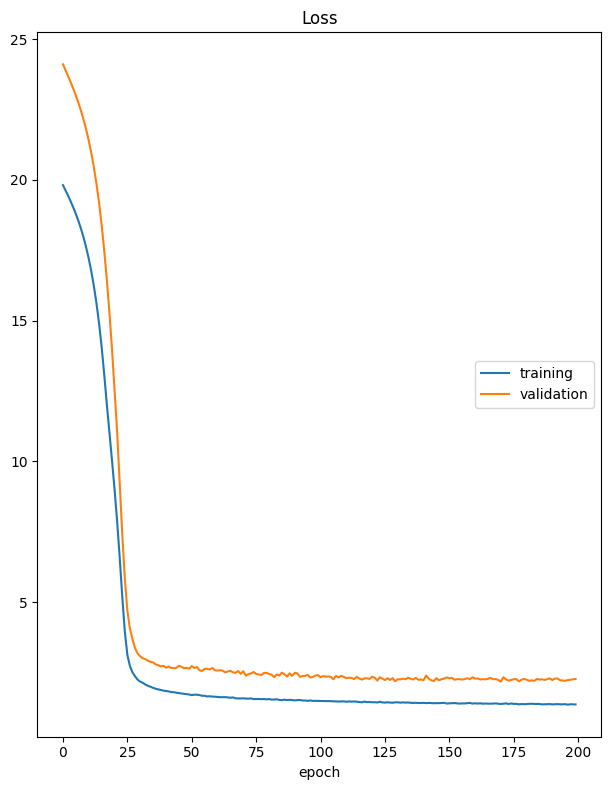

Loss
	training         	 (min:    1.351, max:   19.812, cur:    1.362)
	validation       	 (min:    2.171, max:   24.104, cur:    2.265)


In [24]:
# Run training
trained_model = train(mlp, loss_fn, optimizer, train_loader, valid_loader, epoch=200)

----

<!-- JPN -->
### 課題 5.1（発展）
分類問題では損失関数は `BCEWithLogitsLoss` や `CrossEntropyLoss` を用いていた。何故回帰問題では `L1Loss` など、異なる損失関数を使う必要があるのか述べよ。

<!-- ENG -->
### Exercise 5.1 (Advanced)

In the classification problem, the loss functions were `BCEWithLogitsLoss` and `CrossEntropyLoss`. Discuss why it is necessary to use different loss functions such as `L1Loss` for regression problem.

<!-- JPN -->
<font color=orange> **このテキストセルをダブルクリックし答案を記述せよ。** </font>
<!-- この下の行から答案を記述 -->


<!-- ENG -->
<font color=orange> **Double-click this text cell and write your answer.** </font>
<!-- From the next line, write your answer -->
L1Loss is commonly used as it directly measures the magnitude of errors.
Classification tasks involve predicting discrete class labels or probabilities, requiring different loss functions that are tailored to these objectives.

----

<!-- JPN -->
### 課題 5.2
学習済みモデルを用いて、以下の値を報告せよ。

- 部分訓練データに対する平均絶対誤差 MAE `mae_mlp_train`
- 検証データに対する平均絶対誤差 MAE `mae_mlp_valid`
- テストデータに対する平均絶対誤差 MAE `mae_mlp_test`

なお、テストデータの準備は行っていないため、適宜予測・評価を行うための準備をせよ。

<!-- ENG -->
### Exercise 5.2

Using the trained model, report the following values.

- MAE (mean absolute error) for partial training data `mae_mlp_train`
- MAE for validation data `mae_mlp_valid`
- MAE for test data `mae_mlp_test`

Note that preparation of the test data has not been done, so prepare for prediction and evaluation.

In [26]:
# Test data preparation
test_std_X = ss.transform(test_X)
test_X_torch = torch.tensor(test_std_X, dtype=torch.float)
test_Y_torch = torch.tensor(test_y.reshape(-1, 1), dtype=torch.float)
test_dataset = torch.utils.data.TensorDataset(test_X_torch, test_Y_torch)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

mae_mlp_train = calculate(trained_model, loss_fn, train_loader)
mae_mlp_valid = calculate(trained_model, loss_fn, valid_loader)
mae_mlp_test  = calculate(trained_model, loss_fn, test_loader)

print(f"MAE for Training Data (MLP): {mae_mlp_train}")
print(f"MAE for Validation Data (MLP): {mae_mlp_valid}")
print(f"MAE for Test Data (MLP): {mae_mlp_test}")

MAE for Training Data (MLP): 1.351661396913292
MAE for Validation Data (MLP): 2.2654666313758263
MAE for Test Data (MLP): 4.276797583523918


----

<!-- JPN -->
### 課題 5.3

このデータに対しては畳み込みニューラルネットワーク CNN を適用することができない（利用することは不適である）。その理由を簡潔に答えよ。

<!-- ENG -->
### Exercise 5.3

The convolutional neural network (CNN) cannot be applied to this data (it is unsuitable to use). Briefly answer the reason.

<!-- JPN -->
<font color=orange> **このテキストセルをダブルクリックし答案を記述せよ。** </font>
<!-- この下の行から答案を記述 -->


<!-- ENG -->
<font color=orange> **Double-click this text cell and write your answer.** </font>
<!-- From the next line, write your answer -->
The reason CNNs are unsuitable for tabular data in this regression problem, is that CNNs are designed to work with grid-like data structures such as images. CNNs are particularly effective in capturing local patterns, hierarchies of features, and translational invariance, which are prevalent in image data.

----

<!-- JPN -->
## 6 | 自由課題


<!-- ENG -->
## 6 | Application to your own task


<!-- JPN -->
### 課題 6（実践）
各自で準備したデータセットに対して、本演習で学んだ内容やその他の機械学習手法を用いて何らかの学習・予測を行え。提出の際には**新規のipynbファイルを作成**し、可能であればデータセットのcsvファイルも併せて提出せよ。

<!-- ENG -->
### Exercise 6 (Practical)
On the dataset you prepared, apply what you learned in this exercise and other machine learning methods to train and predict. When submitting, **create a new ipynb file**, and if possible, submit a csv file of the dataset as well.

---